# Plot 2025v1

In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import pylab as plt
import pickle

In [2]:
# Load the data

iclr = pd.read_parquet('../data/iclr25v1.parquet')

Z = np.load('../results/variables/iclr25v1/embeddings_sbert/tsne_av.npy')

label2color = pickle.load(open('../results/variables/iclr25v1/dict_label_to_color.pkl', 'rb'))

In [3]:
label2abbr = {
    'optimization': 'optim',
    'transfer learning': 'transfer',
    'LLMs': 'LLM',
    'language models': 'lang',
    'semi-supervised learning': 'semi-sup',
    'RL': 'RL',
    'RNNs': 'RNN',
    'meta learning': 'meta',
    'imitation learning': 'imitation',
    'transformers': 'transf',
    'CNNs': 'CNN',
    'adversarial': 'adv',
    'GANs': 'GAN',
    'compression': 'compress',
    'autoencoders': 'AE',
    'graphs': 'graphs',
    'clustering': 'cluster',
    'few-shot learning': 'few-shot',
    'object detection': 'obj det',
    'continual learning': 'continual',
    'interpretability': 'interp',
    'multi-task learning': 'multi-task',
    'time series': 'time series',
    'active learning': 'active',
    'multi-agent RL': 'multi-ag RL',
    'optimal transport': 'OT',
    'privacy': 'privacy',
    'pruning': 'pruning',
    'neural architecture search': 'architect',
    'fairness': 'fair',
    'robustness': 'robust',
    'out-of-distribution': 'OOD',
    'causality': 'causal',
    'model-based RL': 'model-b RL',
    'diffusion models': 'diffusion',
    'anomaly detection': 'anomaly',
    'self-supervised learning': 'SSL',
    'federated learning': 'federated',
    'explainability': 'explain',
    'knowledge distillation': 'distill',
    'contrastive learning': 'contrastive',
    'offline RL': 'offline',
    'vision-language models': 'vis-lang',
    'ViTs': 'ViT',
    'llms': 'LLM',
    'in-context learning': 'in-context',
    'alignment': 'align',
    'autonomous driving': 'driving',
    'code generation': 'code gen',
    'knowledge graphs': 'knowl graph',
    'neuroscience': 'neuro',
    'safety': 'safety',
}

<IPython.core.display.Javascript object>


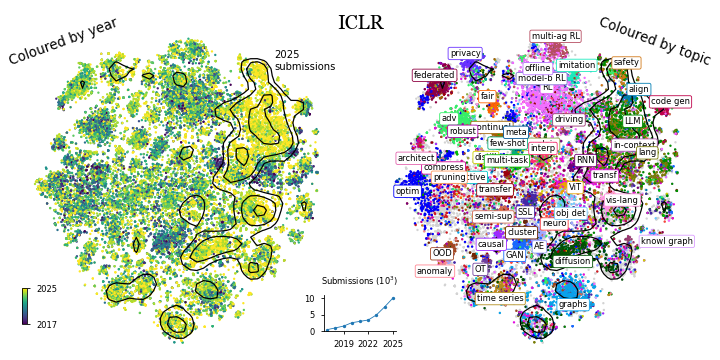

In [4]:
from sklearn.neighbors import KernelDensity

fig, axs = plt.subplots(ncols=2, figsize=(6.0, 3.0), layout="constrained")

axs[0].axis("equal")
np.random.seed(42)
reorder = np.random.permutation(Z.shape[0])
sc = axs[0].scatter(
    Z[reorder, 0], Z[reorder, 1], s=2, c=iclr.year[reorder], ec="none", rasterized=True
)

clf = KernelDensity(kernel="gaussian", bandwidth=5).fit(Z[iclr.year == 2025, :])
x = np.linspace(-100.0, 100.0)
y = np.linspace(-100.0, 100.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
ZZ = clf.score_samples(XX)
ZZ = ZZ.reshape(X.shape)
CS = axs[0].contour(
    X, Y, ZZ, levels=[-9.9, -9.5, -9], colors='k', linewidths=.75, linestyles='-',
)
axs[0].text(57, 67, '2025\nsubmissions', fontsize=6)

axs[0].axis("off")

axclb = plt.axes([0.03, 0.1, 0.008, 0.1])
cb = fig.colorbar(sc, cax=axclb, ticks=[2017, 2025])
cb.ax.tick_params(labelsize=7)
axclb.tick_params(axis='both', labelsize=5, width=.5, length=2)
for axis in ['top', 'bottom', 'left', 'right']:
    axclb.spines[axis].set_linewidth(.5)
cb.outline.set_linewidth(.5)

axs[1].axis("equal")
axs[1].scatter(
    Z[iclr.labels == "unlabeled", 0],
    Z[iclr.labels == "unlabeled", 1],
    s=2,
    c=label2color["unlabeled"],
    ec="none",
    rasterized=True,
)
axs[1].axis("off")

ind = iclr.labels != "unlabeled"
reorder = np.random.permutation(np.sum(ind))
axs[1].scatter(
    Z[ind, 0][reorder],
    Z[ind, 1][reorder],
    s=2,
    ec="none",
    c=[label2color[c] for c in iclr.labels.values[ind][reorder]],
    rasterized=True,
)

CS = axs[1].contour(
    X, Y, ZZ, levels=[-9.9, -9.5, -9], colors='k', linewidths=.75, linestyles='-',
)

for label in np.unique(iclr.labels.values):
    if label == "unlabeled":
        continue

    ind = label == iclr.labels.values
    if np.sum(ind) > 500:
        bw = 10
    else:
        bw = 2
    kde = KernelDensity(kernel="gaussian", bandwidth=bw).fit(Z[ind])
    log_density = kde.score_samples(Z[ind])
    mode = Z[ind][np.argmax(log_density)]
    mode += mode / np.linalg.norm(mode) * 7
    axs[1].text(
        mode[0],
        mode[1],
        label2abbr[label],
        ha="center",
        va="center",
        c="k",
        fontsize=5,
        bbox=dict(
            facecolor="w",
            alpha=1,
            edgecolor=label2color[label],
            boxstyle="round, pad=.2",
            linewidth=0.5,
        ),
    )

fig.text(0.01, 0.82, "Coloured by year", fontsize=8, rotation=20)
fig.text(0.99, 0.82, "Coloured by topic", fontsize=8, rotation=-20, ha="right")

ax = plt.axes([.45, .08, .1, .1])
years = np.arange(2017, 2026)
n_submissions = [np.sum(iclr.year==y) for y in years]
ax.plot(years, np.array(n_submissions) / 1000, '.-', lw=.5, markersize=2)
ax.set_title('Submissions ($10^3$)', fontsize=5)
ax.set_ylim([0, 11])
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis='both', labelsize=5, width=.5, length=2)
ax.set_yticks([0, 5, 10])
ax.set_xticks([2019, 2022, 2025])
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(.5)
    
fig.text(0.5, 0.92, "ICLR", fontsize=12, ha="center", fontname="Georgia")

fig.savefig('../results/figures/iclr2025v1/embedding.png', dpi=300)

<IPython.core.display.Javascript object>


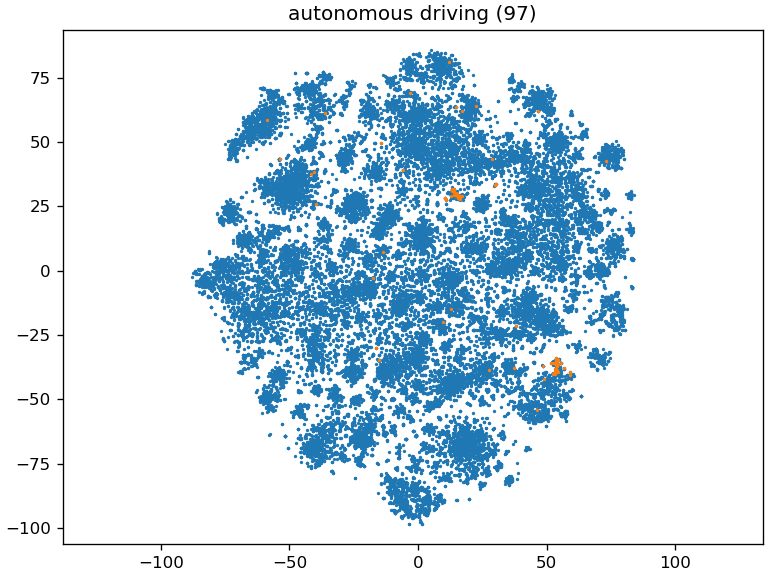

In [5]:
# Where a given keyword is

keyword = 'autonomous driving'

ind = [keyword in keys for keys in iclr.keywords]

plt.figure(layout='constrained')
plt.axis('equal')
plt.title(keyword + f' ({np.sum(ind)})')
plt.scatter(Z[:, 0], Z[:, 1], s=1)
plt.scatter(Z[ind, 0], Z[ind, 1], s=1)

<IPython.core.display.Javascript object>


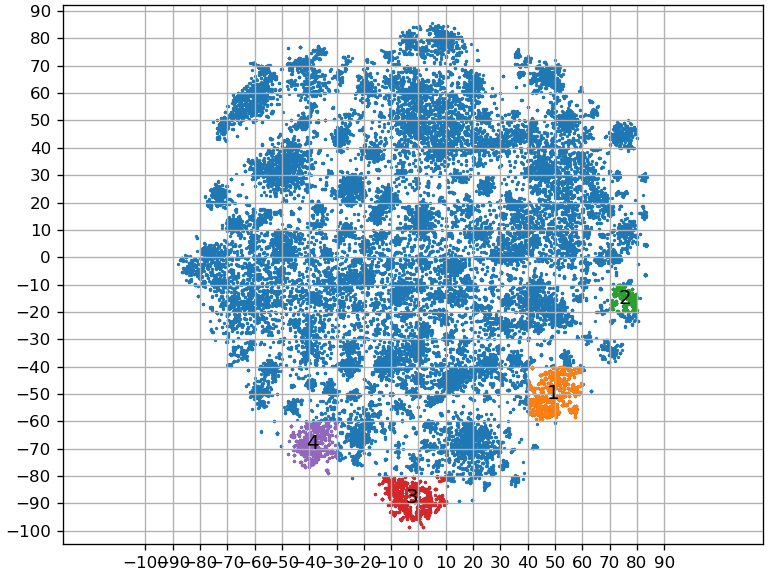

1: 3d reconstruction, novel view synthesis, nerf, computer vision, gaussian splatting 

2: speech synthesis, text-to-speech, speech recognition, self-supervised learning, audio generation 

3: drug discovery, graph neural networks, molecule generation, deep learning, diffusion models 

4: partial differential equations, deep learning, dynamical systems, physics-informed neural networks, pdes 



In [6]:
# What are the unlabeled islands?

plt.figure(layout='constrained')
plt.axis('equal')
plt.scatter(Z[:, 0], Z[:, 1], s=1)
plt.grid('on')
plt.xticks(np.arange(-100, 100, 10))
plt.yticks(np.arange(-100, 100, 10))

idxx = [
    (Z[:,0] > 40) & (Z[:,0] < 60) & (Z[:,1] > -60) & (Z[:,1] < -40),
    (Z[:,0] > 70) & (Z[:,0] < 80) & (Z[:,1] > -20) & (Z[:,1] < -10),
    (Z[:,0] > -20) & (Z[:,0] < 10) & (Z[:,1] > -100) & (Z[:,1] < -80),
    (Z[:,0] > -50) & (Z[:,0] < -30) & (Z[:,1] > -80) & (Z[:,1] < -60),
]

for i, idx in enumerate(idxx):
    plt.scatter(Z[idx, 0], Z[idx, 1], s=1)
    plt.text(np.mean(Z[idx, 0]), np.mean(Z[idx, 1]), i + 1, ha="center", va="center", fontsize=12)
    
    key = iclr[idx].keywords.values
    k, v = np.unique(np.concatenate(key), return_counts=True)
    k = k[np.argsort(v)][-5:][::-1]
    print(f'{i + 1}: ' + ', '.join(k), '\n')